In [9]:
import networkx as nx
import matplotlib.pyplot as plt
from src.Gates import PauliGate, PauliExpression

Approach I) Form graph w. edges between non-commuting terms and perform graph coloring - https://arxiv.org/pdf/1907.07859.pdf
Approach II) Form graph w. edges between commuting terms and perform minimum-clique cover - https://arxiv.org/pdf/1907.13623.pdf

In [10]:
term= 'xy'
obj = PauliGate(name=term)
obj.matrix()

array([[0.+0.j, 0.+0.j, 0.+0.j, 0.-1.j],
       [0.+0.j, 0.+0.j, 0.+1.j, 0.+0.j],
       [0.+0.j, 0.-1.j, 0.+0.j, 0.+0.j],
       [0.+1.j, 0.+0.j, 0.+0.j, 0.+0.j]])

In [11]:
expression = 'XXII+YYII+IXXI+IYYI+IIXX+IIYY'
obj = PauliExpression(expression=expression)
obj.terms()

{0: 'XXII', 1: 'YYII', 2: 'IXXI', 3: 'IYYI', 4: 'IIXX', 5: 'IIYY'}

In [12]:
obj.commutator_map()

{(0, 1): True,
 (0, 2): True,
 (0, 3): False,
 (0, 4): True,
 (0, 5): True,
 (1, 2): False,
 (1, 3): True,
 (1, 4): True,
 (1, 5): True,
 (2, 3): True,
 (2, 4): True,
 (2, 5): False,
 (3, 4): False,
 (3, 5): True,
 (4, 5): True}

In [14]:
# Create complement graph
complement_graph = nx.complement(G)

# Find graph coloring
coloring = nx.coloring.greedy_color(complement_graph,strategy="largest_first")

# Organize nodes by color (each color class is a clique in the original graph)
clique_cover = {}
for node, color in coloring.items():
    if color in clique_cover:
        clique_cover[color].append(node)
    else:
        clique_cover[color] = [node]

# The values of clique_cover are the cliques
min_clique_cover = list(clique_cover.values())
print(min_clique_cover)

[['(2,IXXI)', '(3,IYYI)'], ['(0,XXII)', '(1,YYII)', '(4,IIXX)', '(5,IIYY)']]


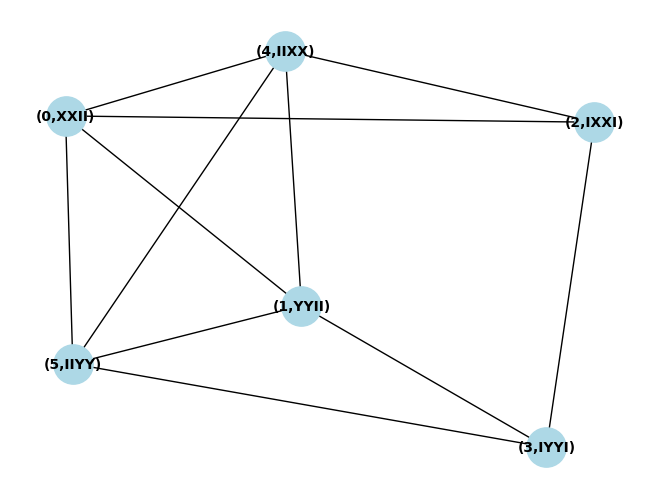

In [13]:
G = nx.Graph()
for term_idx, label in obj.terms().items():
    G.add_node(node_for_adding='('+str(term_idx)+','+label+')')
for (i,j), are_commutating in obj.commutator_map().items():
    if are_commutating:
        edge_i, edge_j = '('+str(i)+','+obj.terms()[i]+')', '('+str(j)+','+obj.terms()[j]+')'
        G.add_edge(u_of_edge=edge_i,v_of_edge=edge_j)
nx.draw(G, with_labels=True, node_color='lightblue', node_size=800, font_size=10, font_weight='bold')
plt.show()

In [1]:
import numpy as np

_0_ = np.array([[1], [0]], dtype=np.complex64)
_1_ = np.array([[0], [1]], dtype=np.complex64)

_0_@_0_.T

array([[1.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j]], dtype=complex64)

In [5]:
v = -np.pi/2
R_y = np.array([[np.cos(v/2), np.sin(v/2)],
                [-np.sin(v/2), np.cos(v/2)]])
X = np.array([[0,1],
              [1,0]])
R_y.conjugate().T@(X@R_y)

array([[ 1.00000000e+00,  4.26642159e-17],
       [-4.26642159e-17, -1.00000000e+00]])